# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("../train_data.csv")
valid_data = pd.read_csv("../valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(534, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [4]:
print(valid_data.shape)
valid_data.head()

(229, 2)


,Date,count
0,2014-02-09,196
1,2014-02-10,299
2,2014-02-11,224
3,2014-02-12,216
4,2014-02-13,212


# Required Preprocessing 

In [5]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [6]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

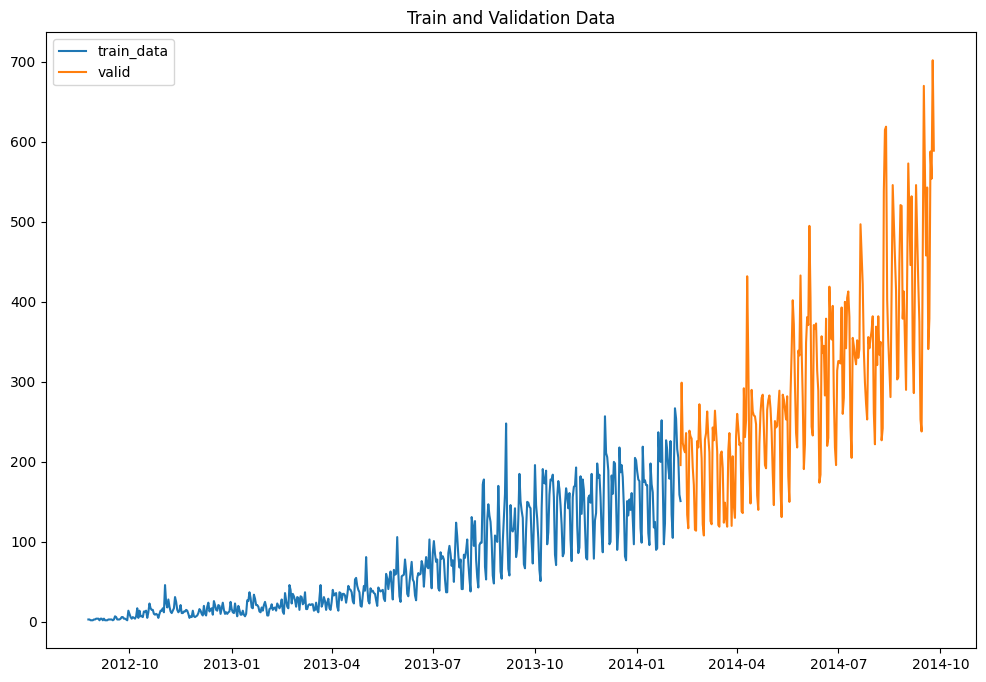

In [7]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Stationarity Test

In [8]:
# dickey fuller, KPSS
from statsmodels.tsa.stattools import adfuller, kpss

In [9]:
def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [10]:
adf_test(train_data['count'])

Results of Dickey-Fuller Test:
Test Statistic                   1.182399
p-value                          0.995862
#Lags Used                      19.000000
Number of Observations Used    514.000000
Critical Value (1%)             -3.443136
Critical Value (5%)             -2.867179
Critical Value (10%)            -2.569774
dtype: float64


 If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary). **Here test statistic is > than critical. Hence series is not stationary**

In [11]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [12]:
kpss_test(train_data['count'])

Results of KPSS Test:
Test Statistic            3.256383
p-value                   0.010000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Prashant\AppData\Local\Temp\ipykernel_26100\598097767.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary).  **Here test statistic is > than critical. Hence series is not stationary**

Alternatively, we can use the p-value to make the inference. If p-value is less than 0.05, we can reject the null hypothesis. And say that the series is not stationary.

# Making Series Stationary

In [253]:
train_data['count_diff'] = train_data['count'] - train_data['count'].shift(1)

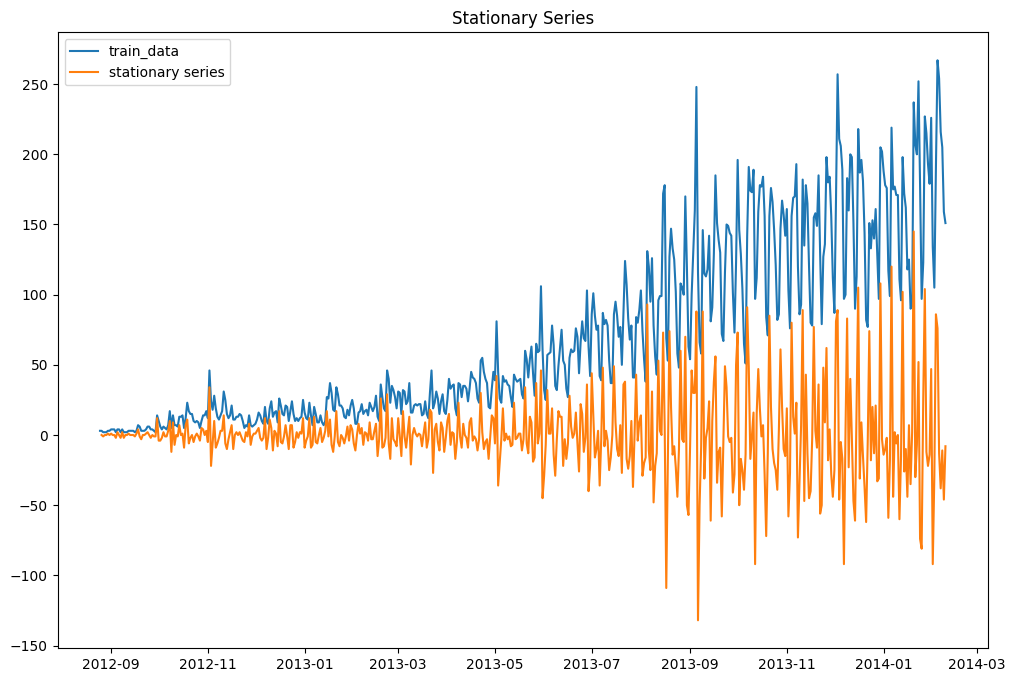

In [254]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(train_data.index,train_data['count_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [255]:
train_data['count_log'] = np.log(train_data['count'])
train_data['count_log_diff'] = train_data['count_log'] - train_data['count_log'].shift(1)

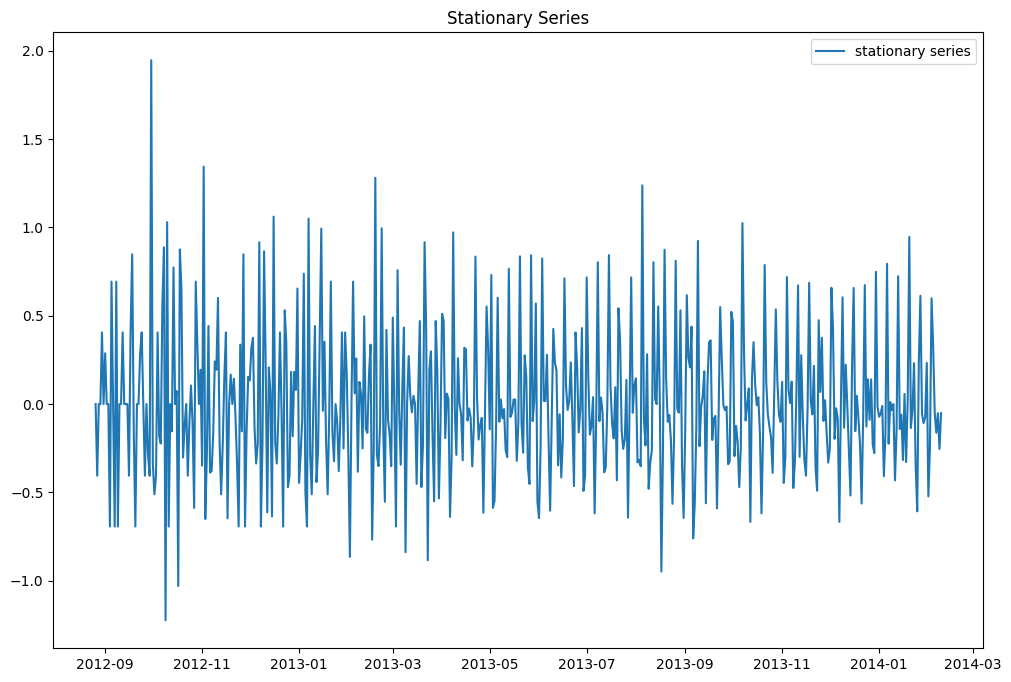

In [256]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count_log_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [257]:
adf_test(train_data['count_log_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.196201e+00
p-value                        2.431038e-10
#Lags Used                     1.900000e+01
Number of Observations Used    5.130000e+02
Critical Value (1%)           -3.443162e+00
Critical Value (5%)           -2.867190e+00
Critical Value (10%)          -2.569780e+00
dtype: float64


In [258]:
kpss_test(train_data['count_log_diff'].dropna())

Results of KPSS Test:
Test Statistic            0.118695
p-value                   0.100000
Lags Used                45.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Prashant\AppData\Local\Temp\ipykernel_26100\598097767.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


# ACF and PACF plots

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

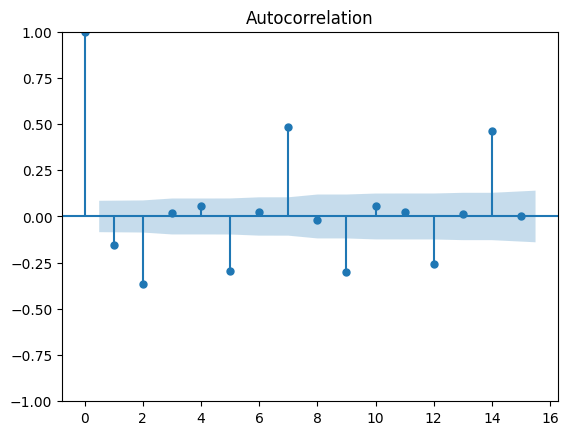

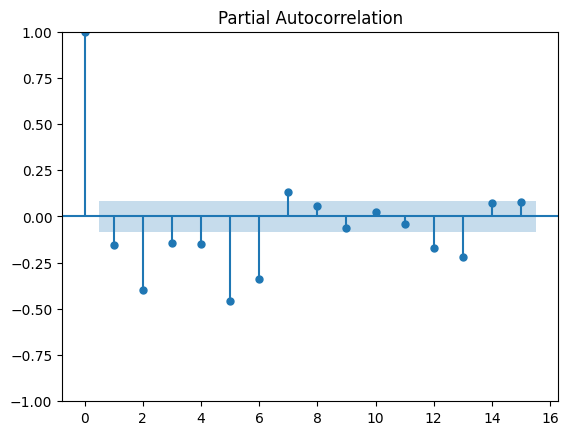

In [20]:
plot_acf(train_data['count_log_diff'].dropna(), lags=15)
plot_pacf(train_data['count_log_diff'].dropna(), lags=15)
plt.show()

   - p value is the lag value where the PACF chart crosses the confidence interval for the first time. It can be noticed that in this case p=2.

   - q value is the lag value where the ACF chart crosses the confidence interval for the first time. It can be noticed that in this case q=2.

   - Now we will make the ARIMA model as we have the p,q values.

# ARIMA

In [259]:
from statsmodels.tsa.arima.model import ARIMA

In [433]:
# fit model
model = ARIMA(train_data['count_log'], order=(2,2,5), missing='drop')   # (2,1,2) are the values of p,d,q
model_fit = model.fit()

C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [434]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              count_log   No. Observations:                  534
Model:                 ARIMA(2, 2, 5)   Log Likelihood                -188.680
Date:                Fri, 08 Dec 2023   AIC                            393.360
Time:                        14:18:35   BIC                            427.573
Sample:                    08-25-2012   HQIC                           406.749
                         - 02-09-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8591      0.041    -20.968      0.000      -0.939      -0.779
ar.L2         -0.8941      0.035    -25.813      0.000      -0.962      -0.826
ma.L1         -0.5189      0.060     -8.614      0.0

In [435]:
valid_data.shape

(229, 6)

In [436]:
# gernerate forecasts
output = model_fit.forecast(len(valid_data)) 
output

2014-02-10    5.123989
2014-02-11    5.278423
2014-02-12    5.223680
2014-02-13    5.171855
2014-02-14    5.276677
                ...   
2014-09-22    6.137963
2014-09-23    6.142087
2014-09-24    6.146211
2014-09-25    6.150334
2014-09-26    6.154458
Freq: D, Name: predicted_mean, Length: 229, dtype: float64

In [437]:
valid_data['Arima'] = output

In [438]:
valid_data.head()

,Date,count,Arima,Arima_in_orig_scale,Arima_pred,SARIMA
Date,,,,,,
2014-02-09,2014-02-09,196,NaN,NaN,NaN,130.568002
2014-02-10,2014-02-10,299,5.123989,164.432817,164.432817,244.767276
2014-02-11,2014-02-11,224,5.278423,195.112244,195.112244,263.997077
2014-02-12,2014-02-12,216,5.223680,189.872512,189.872512,249.107909
2014-02-13,2014-02-13,212,5.171855,172.424420,172.424420,230.751935


In [439]:
# to deal with log transformed values
valid_data['Arima_in_orig_scale'] = np.exp(valid_data['Arima'])

In [440]:
valid_data.head(10)

,Date,count,Arima,Arima_in_orig_scale,Arima_pred,SARIMA
Date,,,,,,
2014-02-09,2014-02-09,196,NaN,NaN,NaN,130.568002
2014-02-10,2014-02-10,299,5.123989,168.004243,164.432817,244.767276
2014-02-11,2014-02-11,224,5.278423,196.060432,195.112244,263.997077
2014-02-12,2014-02-12,216,5.223680,185.616019,189.872512,249.107909
2014-02-13,2014-02-13,212,5.171855,176.241438,172.424420,230.751935
2014-02-14,2014-02-14,236,5.276677,195.718420,193.516128,227.216696
2014-02-15,2014-02-15,134,5.244308,189.484741,193.508403,142.609662
2014-02-16,2014-02-16,117,5.189754,179.424455,176.275329,127.973459
2014-02-17,2014-02-17,239,5.276917,195.765404,193.066441,264.305329


In [441]:
valid_data["Arima_pred"] = valid_data['Arima_in_orig_scale']

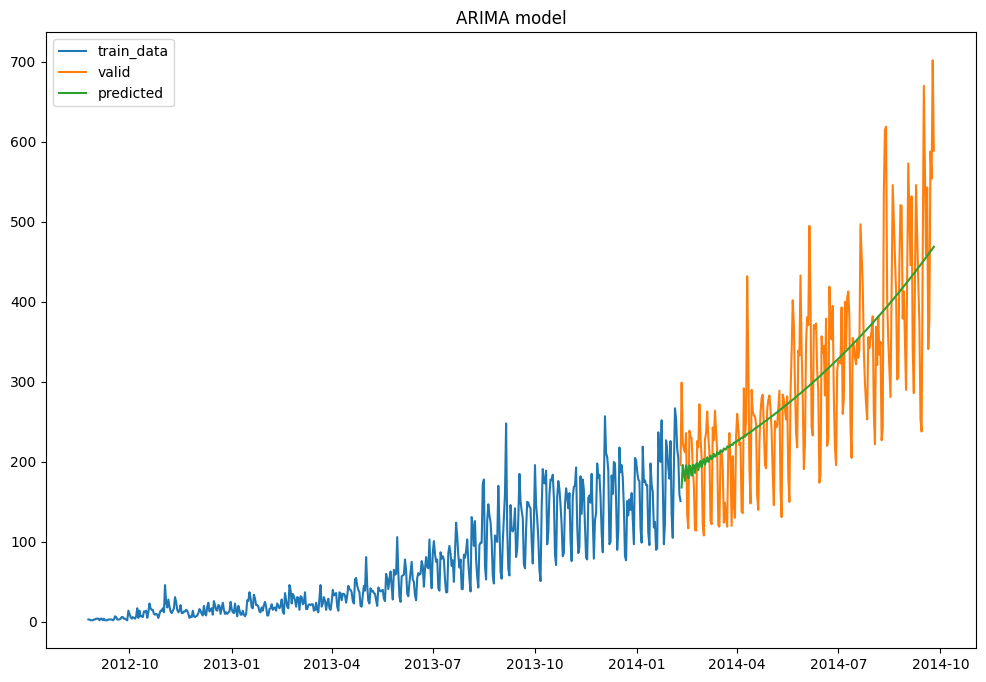

In [442]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index, valid_data['count'], label='valid')
plt.plot(valid_data.index, valid_data['Arima_pred'], label='predicted')

plt.legend(loc='best')
plt.title("ARIMA model")
plt.show()

In [443]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'].iloc[1:], valid_data['Arima_pred'].iloc[1:]))
print('The RMSE value for ARIMA is', rmse)

The RMSE value for ARIMA is 79.55616296054144


# SARIMA

In [419]:
from statsmodels.tsa.statespace import sarimax

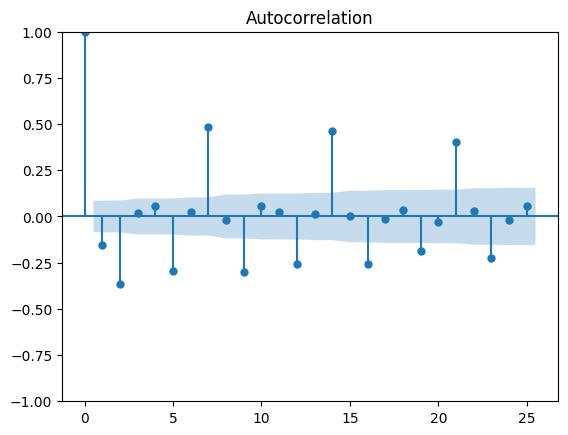

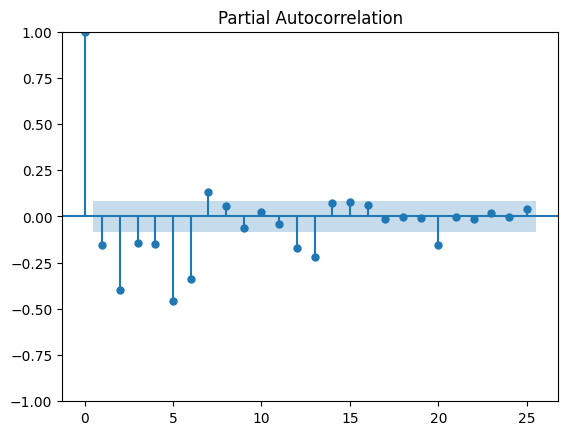

In [420]:
plot_acf(train_data['count_log_diff'].dropna(), lags=25)
plot_pacf(train_data['count_log_diff'].dropna(), lags=25)
plt.show()

In [421]:
train_data['count_log'] = np.log(train_data['count'])
train_data['count_log_diff'] = train_data['count_log'] - train_data['count_log'].shift(7)

In [422]:
train_data['count_log_diff'].head(10)

Date
2012-08-25         NaN
2012-08-26         NaN
2012-08-27         NaN
2012-08-28         NaN
2012-08-29         NaN
2012-08-30         NaN
2012-08-31         NaN
2012-09-01    0.287682
2012-09-02    0.287682
2012-09-03    0.693147
Name: count_log_diff, dtype: float64

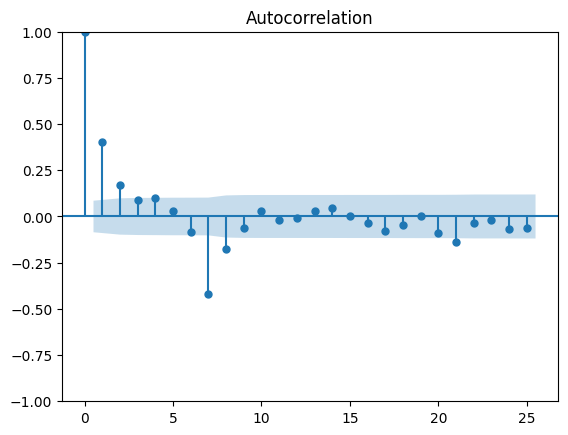

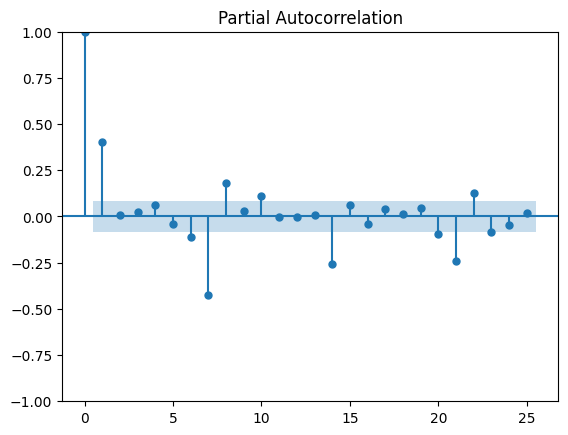

In [423]:
plot_acf(train_data['count_log_diff'].dropna(), lags=25)
plot_pacf(train_data['count_log_diff'].dropna(), lags=25)
plt.show()

In [453]:
# fit model
model = sarimax.SARIMAX(train_data['count_log'], seasonal_order=(1,1,1,7), order=(3,2,5))
fit1 = model.fit()

# make predictions
valid_data['SARIMA'] = fit1.predict(start="2014-02-09", end="2014-09-25", dynamic=True)

C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [454]:
valid_data['SARIMA'] = np.exp(valid_data['SARIMA'])

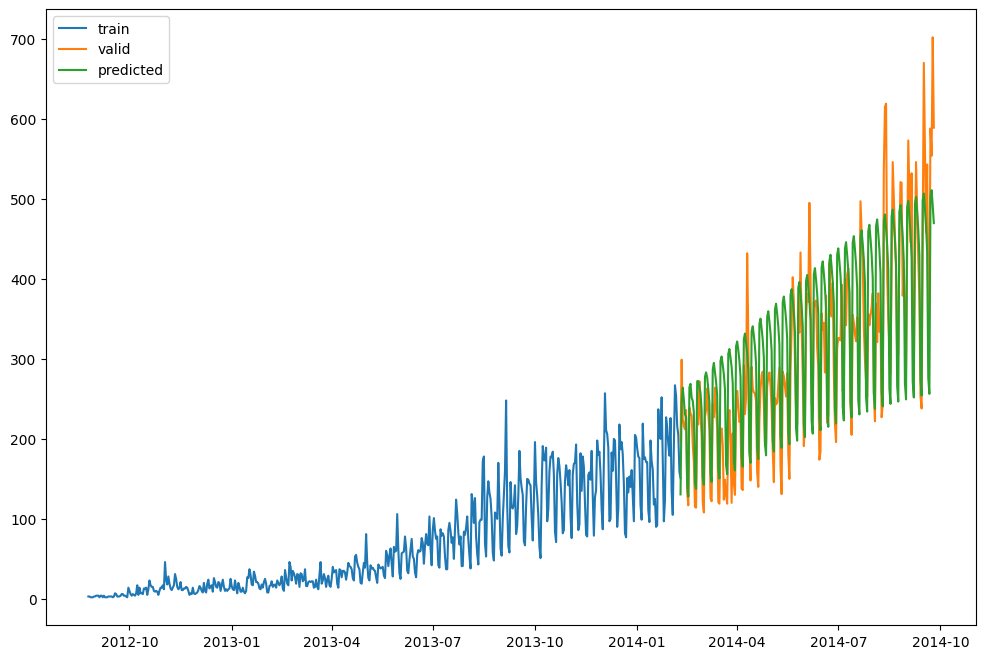

In [455]:
plt.figure(figsize=(12,8))

plt.plot(train_data['count'],  label='train') 
plt.plot(valid_data['count'],  label='valid') 
plt.plot(valid_data['SARIMA'],  label='predicted') 
plt.legend(loc='best') 
plt.show()

In [456]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['SARIMA']))
print('The RMSE value for SARIMA is', rmse)

The RMSE value for SARIMA is 66.66278284547154


In [52]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Load your time series data
# df = pd.read_csv('your_timeseries_data.csv')
# For this example, let's assume df is your DataFrame and 'date' and 'value' are columns
# df['date'] = pd.to_datetime(df['date'])
# ts = df.set_index('date')['value']

# For demonstration, let's use statsmodels' built-in dataset
data = sm.datasets.sunspots.load_pandas().data
ts = data['SUNACTIVITY']

# Define and fit the model
# ARIMA parameters are (p, d, q)
# p: periods taken for autoregressive model
# d: integrated order, difference
# q: periods in moving average model
model = ARIMA(ts, order=(5,1,0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make forecast
forecast = model_fit.forecast(steps=5)
print(forecast)


                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1312.926
Date:                Thu, 07 Dec 2023   AIC                           2637.851
Time:                        16:21:48   BIC                           2660.232
Sample:                             0   HQIC                          2646.800
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4511      0.048      9.358      0.000       0.357       0.546
ar.L2         -0.0806      0.050     -1.602      0.109      -0.179       0.018
ar.L3         -0.2144      0.065     -3.299      0.0